# Function Tranform:

1. Log Tranform.
2. Reciprocal Tranform.
3. Power (sq/sqrt).
4. Box-Cox.
5. Yeo-Johnson.
--------------
- These tranformers are used for convert different distributions into nomral distribution.
- Some ML algo better performed on mornal distribution data.
  - EXP: Linera reg , Logistic reg etc.
--------------
**How to find data is normal or not**
- Make Distplot.
- Use skew func.
--------------
**QQ Plot**
- To see the distribution is normal or not.
- If all points on chart is on the line its called normal distribution.
--------------
**Log Tranform**
- In mathematical aspect we take log of the value.
- (-ve) negetive values are doesn't supported.
- Specially good for Right Skewed distribution.
-------------
**Reciprocal**
- Big values conberted into small values and small values converted into big values.
-------------
**Square (X^2)**
- Specially good for left Skewed data.
-------------
  

## Import Libraries:

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer

## Load Dataset:

In [197]:
df=pd.read_csv('../Data/Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [198]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [199]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [200]:
df.dropna(inplace=True)

In [201]:
df=df.iloc[:,[0,4,5]]

In [202]:
df

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
6699,49.0,20.0,200000.0
6700,32.0,3.0,50000.0
6701,30.0,4.0,55000.0
6702,46.0,14.0,140000.0


## Train test split:

In [203]:
X_train,X_test,y_train,y_test=train_test_split(df[['Age','Years of Experience']],df['Salary'],test_size=0.2,random_state=42)

In [204]:
X_train

,Age,Years of Experience
3426,39.0,10.0
1552,38.0,10.0
6021,35.0,12.0
4461,30.0,1.0
3286,23.0,1.0
...,...,...
3776,29.0,4.0
5195,38.0,14.0
5230,25.0,1.0
5395,27.0,1.0


**Make plot to see the distribution**

Text(0.5, 1.0, 'Age QQ Plot')

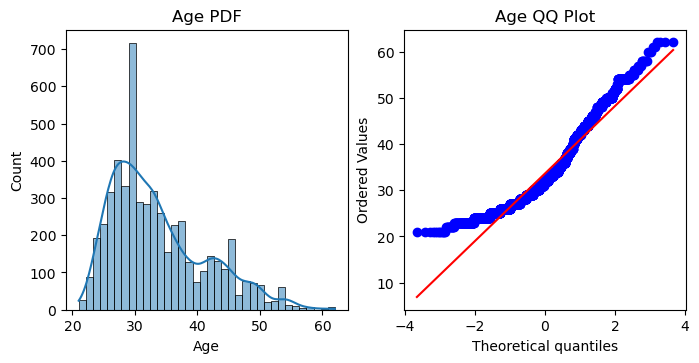

In [205]:
plt.figure(figsize=(8,8))

ax=plt.subplot(2,2,1)
sns.histplot(X_train['Age'],kde=True)
plt.title('Age PDF')

ax=plt.subplot(2,2,2)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

**It is right skewed data we know Log tranformer is best form right skewed data.**

Text(0.5, 1.0, 'Years of Experience QQ Plot')

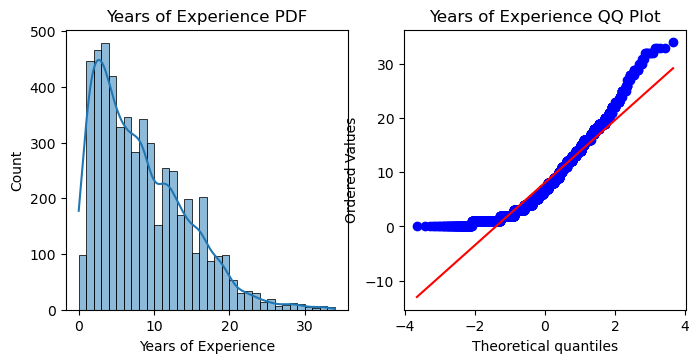

In [206]:
plt.figure(figsize=(8,8))

ax=plt.subplot(2,2,1)
sns.histplot(X_train['Years of Experience'],kde=True)
plt.title('Years of Experience PDF')

ax=plt.subplot(2,2,2)
stats.probplot(X_train['Years of Experience'],dist='norm',plot=plt)
plt.title('Years of Experience QQ Plot')

**It something right skewed we try all tranformation to check which is suit to this.**

**Now we apply Ml algo to see before appling tranformation score and after appling transformation score.**

In [207]:
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()

lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy of Logistic Regression:", accuracy_lr)
print("Accuracy of Decision Tree Classifier:", accuracy_dt)

Accuracy of Logistic Regression: 0.11865671641791045
Accuracy of Decision Tree Classifier: 0.4253731343283582


c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Now we apply Log tranform**

In [208]:
trf=FunctionTransformer(func=np.log1p)

X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

**After applying tranformer**

In [209]:
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()

lr_model.fit(X_train_trf, y_train)
dt_model.fit(X_train_trf, y_train)

y_pred_lr = lr_model.predict(X_test_trf)
y_pred_dt = dt_model.predict(X_test_trf)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy of Logistic Regression:", accuracy_lr)
print("Accuracy of Decision Tree Classifier:", accuracy_dt)

Accuracy of Logistic Regression: 0.11567164179104478
Accuracy of Decision Tree Classifier: 0.4253731343283582


c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Before log Tranformation**
- Accuracy of Logistic Regression: 0.11865671641791045
- Accuracy of Decision Tree Classifier: 0.4253731343283582
  
**After log Transformation**
- Accuracy of Logistic Regression: 0.11567164179104478
- Accuracy of Decision Tree Classifier: 0.4253731343283582


Text(0.5, 1.0, 'Years of Experience after Log')

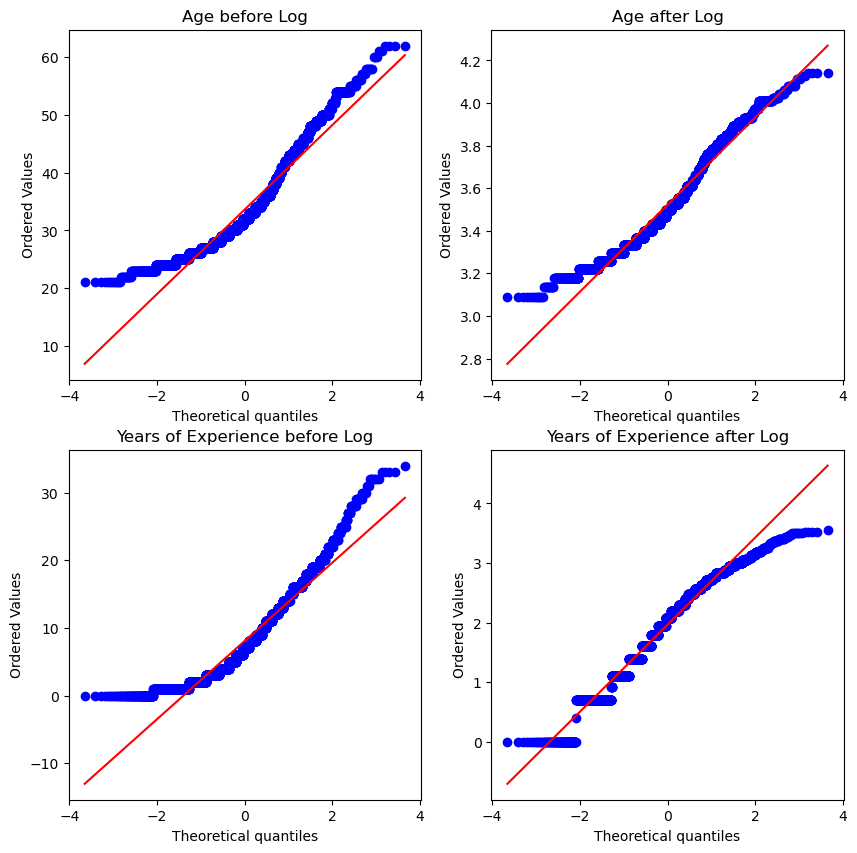

In [210]:
plt.figure(figsize=(10,10))

ax=plt.subplot(2,2,1)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age before Log')

ax=plt.subplot(2,2,2)
stats.probplot(X_train_trf['Age'],dist='norm',plot=plt)
plt.title('Age after Log')


ax=plt.subplot(2,2,3)
stats.probplot(X_train['Years of Experience'],dist='norm',plot=plt)
plt.title('Years of Experience before Log')


ax=plt.subplot(2,2,4)
stats.probplot(X_train_trf['Years of Experience'],dist='norm',plot=plt)
plt.title('Years of Experience after Log')

**Square Tranform**

In [211]:
trf=FunctionTransformer(func=np.square)

X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [212]:
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()

lr_model.fit(X_train_trf, y_train)
dt_model.fit(X_train_trf, y_train)

y_pred_lr = lr_model.predict(X_test_trf)
y_pred_dt = dt_model.predict(X_test_trf)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy of Logistic Regression:", accuracy_lr)
print("Accuracy of Decision Tree Classifier:", accuracy_dt)

Accuracy of Logistic Regression: 0.10746268656716418
Accuracy of Decision Tree Classifier: 0.4253731343283582


c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Before square Tranformation**
- Accuracy of Logistic Regression: 0.11865671641791045
- Accuracy of Decision Tree Classifier: 0.4253731343283582
  
**After square Transformation**
- Accuracy of Logistic Regression: 0.10746268656716418
- Accuracy of Decision Tree Classifier: 0.4253731343283582

Text(0.5, 1.0, 'Years of Experience after square')

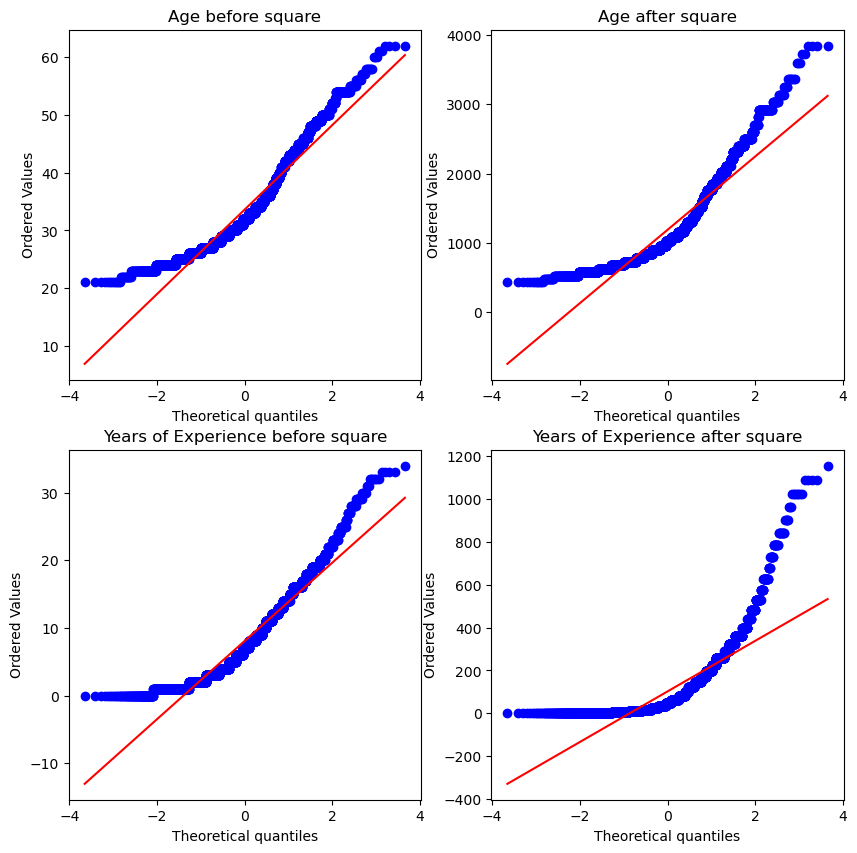

In [213]:
plt.figure(figsize=(10,10))

ax=plt.subplot(2,2,1)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age before square')

ax=plt.subplot(2,2,2)
stats.probplot(X_train_trf['Age'],dist='norm',plot=plt)
plt.title('Age after square')


ax=plt.subplot(2,2,3)
stats.probplot(X_train['Years of Experience'],dist='norm',plot=plt)
plt.title('Years of Experience before square')


ax=plt.subplot(2,2,4)
stats.probplot(X_train_trf['Years of Experience'],dist='norm',plot=plt)
plt.title('Years of Experience after square')

**Sqrt transform**

In [214]:
trf=FunctionTransformer(func=np.sqrt)

X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [215]:
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()

lr_model.fit(X_train_trf, y_train)
dt_model.fit(X_train_trf, y_train)

y_pred_lr = lr_model.predict(X_test_trf)
y_pred_dt = dt_model.predict(X_test_trf)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy of Logistic Regression:", accuracy_lr)
print("Accuracy of Decision Tree Classifier:", accuracy_dt)

Accuracy of Logistic Regression: 0.10895522388059702
Accuracy of Decision Tree Classifier: 0.4253731343283582


c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Before sqrt Tranformation**
- Accuracy of Logistic Regression: 0.11865671641791045
- Accuracy of Decision Tree Classifier: 0.4253731343283582
  
**After sqrt Transformation**
- Accuracy of Logistic Regression: 0.10895522388059702
- Accuracy of Decision Tree Classifier: 0.4253731343283582

Text(0.5, 1.0, 'Years of Experience after sqrt')

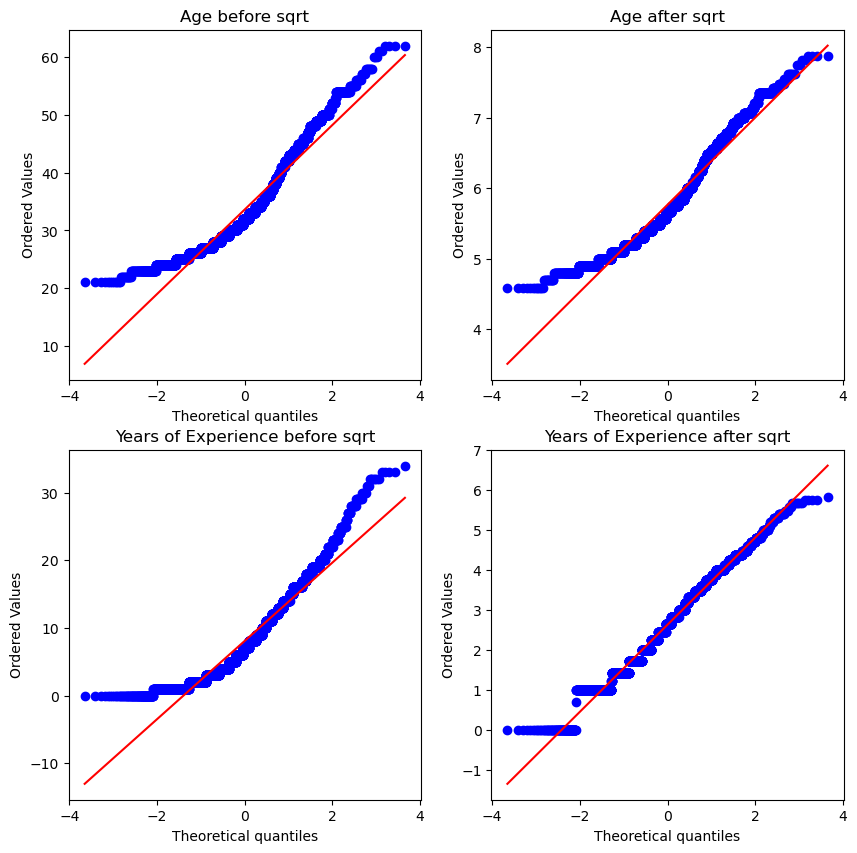

In [216]:
plt.figure(figsize=(10,10))

ax=plt.subplot(2,2,1)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age before sqrt')

ax=plt.subplot(2,2,2)
stats.probplot(X_train_trf['Age'],dist='norm',plot=plt)
plt.title('Age after sqrt')


ax=plt.subplot(2,2,3)
stats.probplot(X_train['Years of Experience'],dist='norm',plot=plt)
plt.title('Years of Experience before sqrt')


ax=plt.subplot(2,2,4)
stats.probplot(X_train_trf['Years of Experience'],dist='norm',plot=plt)
plt.title('Years of Experience after sqrt')

**Reciprocal Tranform**

In [217]:
trf=FunctionTransformer(func=lambda x:1 / (x + 1e-8))

X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [218]:
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()

lr_model.fit(X_train_trf, y_train)
dt_model.fit(X_train_trf, y_train)

y_pred_lr = lr_model.predict(X_test_trf)
y_pred_dt = dt_model.predict(X_test_trf)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy of Logistic Regression:", accuracy_lr)
print("Accuracy of Decision Tree Classifier:", accuracy_dt)

Accuracy of Logistic Regression: 0.033582089552238806
Accuracy of Decision Tree Classifier: 0.4253731343283582


**Before reciprocal Tranformation**
- Accuracy of Logistic Regression: 0.11865671641791045
- Accuracy of Decision Tree Classifier: 0.4253731343283582
  
**After reciprocal Transformation**
- Accuracy of Logistic Regression: 0.033582089552238806
- Accuracy of Decision Tree Classifier: 0.4253731343283582

Text(0.5, 1.0, 'Years of Experience after reciprocal')

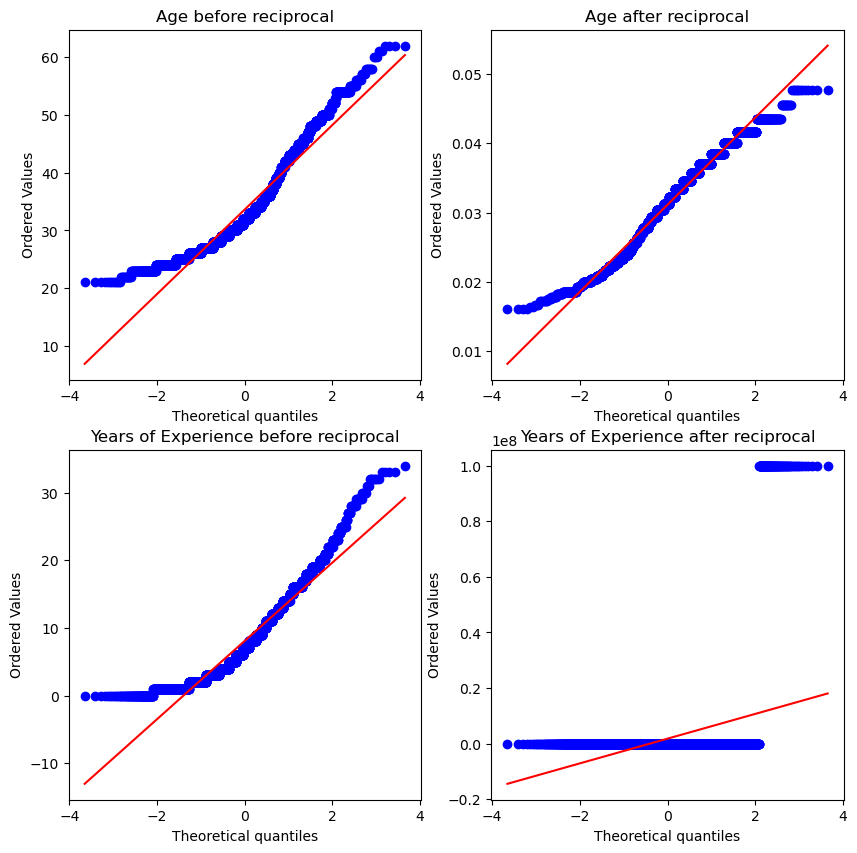

In [219]:
plt.figure(figsize=(10,10))

ax=plt.subplot(2,2,1)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age before reciprocal')

ax=plt.subplot(2,2,2)
stats.probplot(X_train_trf['Age'],dist='norm',plot=plt)
plt.title('Age after reciprocal')


ax=plt.subplot(2,2,3)
stats.probplot(X_train['Years of Experience'],dist='norm',plot=plt)
plt.title('Years of Experience before reciprocal')


ax=plt.subplot(2,2,4)
stats.probplot(X_train_trf['Years of Experience'],dist='norm',plot=plt)
plt.title('Years of Experience after reciprocal')